In [2]:
%run init.ipynb

# Interferômetro de Mach-Zehnder

Da óptica clássica, temos que cada reflexão causa um deslocamento de fase de $\lambda/4$, que equivale a uma mudança de fase de $2\pi/4=\pi/2$ na função de onda. Portanto, nos estados quânticos esse deslocamento de fase vai adicionar uma fase $e^{i\pi/2}=i$ ao estado. A seguir, usaremos a seguinte notação para os estados do modo espacial de movimento do fóton:
\begin{align}
& \text{Modo espacial de movimento na horizontal } |h\rangle:=|0\rangle, \\
& \text{Modo espacial de movimento na vertical } |v\rangle:=|1\rangle.
\end{align}

<img src='fig_imz.png' width='500'>

Consideraremos um DF com transmitância $50\ \%$, i.e., $t=r=0.5$. Seguindo, acompanhamos as operações no interferômetro de Mach-Zehnder (IMZ) mostrado na figura acima obtendo os estados quânticos
\begin{align}
|\psi_{0}\rangle & = |0\rangle, \\
|\psi_{1}\rangle & = (|0\rangle+i|1\rangle)/\sqrt{2}, \\
|\psi_{2}\rangle & = (i|1\rangle+ii|0\rangle)/\sqrt{2} = (-|0\rangle+i|1\rangle)/\sqrt{2}, \\
|\psi_{3}\rangle & = (-|0\rangle+ie^{i\phi}|1\rangle)/\sqrt{2}, \\
|\psi_{4}\rangle & = (-(|0\rangle+i|1\rangle)/\sqrt{2}+ie^{i\phi}(i|0\rangle+|1\rangle)/\sqrt{2})/\sqrt{2} \\
& = -\frac{1+e^{i\phi}}{2}|0\rangle -i\frac{1-e^{i\phi}}{2}|1\rangle.
\end{align}

Com isso, podemos calcular a probabilidade do fóton ser detectado em um certo detector:
\begin{align}
Pr(D_{0}) &= \left|-(1+e^{i\phi})/2\right|^{2} = (2+2\cos\phi)/4 = (1+\cos\phi)/2, \\
Pr(D_{1}) &= 1 - Pr(D_{0}) = (1-\cos\phi)/2.
\end{align}

### Exercício
Obtenha a sequência de estados no interferômetro de Mach-Zehnder e as probabilidades para $|\psi_{0}\rangle=|1\rangle$.

## Simulação do interferômetro de Mach-Zehnder no IBMQ
O __divisor de feixes__ (DF) cria superposição de modos espaciais de movimento, sendo assim simular à porta Hadamard
$$H=\frac{1}{\sqrt{2}}\begin{bmatrix}1&1 \\ 1&-1 \end{bmatrix}.$$
Mas no caso do IMZ, temos ainda a fase dada na reflexão. Na verdade, para um estado de entrada qualquer $|\psi\rangle=c_{0}|0\rangle+c_{1}|1\rangle$ a ação do divisor de feixes é a seguinte
\begin{align}
U_{df}|\psi\rangle & = U_{df}\begin{bmatrix}c_{0}\\c_{1}\end{bmatrix}= c_{0}U_{df}|0\rangle+c_{1}U_{df}|1\rangle \\
& = c_{0}(|0\rangle+i|1\rangle)/\sqrt{2}+c_{1}(i|0\rangle+|1\rangle)/\sqrt{2} \\
& = \frac{c_{0}+ic_{1}}{\sqrt{2}}|0\rangle + \frac{ic_{0}+c_{1}}{\sqrt{2}}|1\rangle = \begin{bmatrix}\frac{c_{0}+ic_{1}}{\sqrt{2}}\\\frac{ic_{0}+c_{1}}{\sqrt{2}}\end{bmatrix}.
\end{align}
Vemos assim que a matriz unitária que representa o DF é
$$U_{df} \doteq \frac{1}{\sqrt{2}}\begin{bmatrix}1&i \\ i&1 \end{bmatrix}.$$
Esta operação é equivalente a 
$$U_{df} \equiv U(\theta=\pi/2, \phi = \pi/2, \lambda = -\pi/2),$$
uma vez que $U(\theta,\phi,\lambda) = \begin{bmatrix} \cos(\theta/2) & -e^{i\lambda}\sin(\theta/2) \\ e^{i\phi}\sin(\theta/2) & e^{i(\phi+\lambda)}\cos(\theta/2) \end{bmatrix}$.

OBS: Depois de terminar de preparar esta aula, me dei por conta de que
\begin{align}
& U_{df}|0\rangle = 2^{-1/2}(|0\rangle+i|1\rangle) = |\oplus\rangle, \\
& U_{df}|1\rangle = 2^{-1/2}(i|0\rangle+|1\rangle) = i2^{-1/2}(|0\rangle-i|1\rangle) = i|\ominus\rangle.
\end{align}
De aulas passadas, sabemos que $SH|0\rangle = |\oplus\rangle$ e $SH|1\rangle = |\ominus\rangle$,
em que
$$S = \begin{bmatrix}1&0 \\ 0&i \end{bmatrix}.$$
Com a ajuda do código abaixo, vemos que
$$U_{df} = SHS.$$

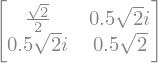

In [10]:
S = Matrix([[1,0],[0,1j]]); Sd = Matrix([[1,0],[0,-1j]]); H = (1/sqrt(2))*Matrix([[1,1],[1,-1]])#; S, H
S*H*S

Já os __espelhos__, $U_{e}$, atuam como segue:
$$U_{e}|0\rangle = i|1\rangle \text{ e } U_{e}|1\rangle = i|0\rangle\ \therefore\ U_{e}\doteq \begin{bmatrix}0&i \\ i&0 \end{bmatrix}.$$

A porta lógica do IBMQ que mais se asemelha essa ação é
$$Y = \begin{bmatrix}0&-i \\ i&0 \end{bmatrix}$$
que é tal que
$$Y|0\rangle = i|1\rangle \text{ e } Y|1\rangle = -i|0\rangle.$$

No entanto, $U_{e}$ e $Y$ se diferenciam em suas ações pelo sinal de menos na última igualdade. Para resolver isso, usamos a porta $Z=\begin{bmatrix}1&0 \\ 0&-1 \end{bmatrix}$:
\begin{align}
& YZ|0\rangle = Y|0\rangle = i|1\rangle \equiv U_{e}|0\rangle, \\
& YZ|1\rangle = -Y|1\rangle = i|0\rangle \equiv U_{e}|1\rangle.
\end{align}
Por conseguinte
$$U_{e} \equiv YZ.$$

A __fase__ $\phi$ no modo espacial vertical do IMZ é implementada diretamente usando a porta de fase
$$U_{\phi} = P(\phi) = \begin{bmatrix}1&0\\0&e^{i\phi}\end{bmatrix},$$
cuja ação na base computacional é 
$$P(\phi)|0\rangle = |0\rangle \text{ e } P(\phi)|1\rangle = e^{i\phi}|1\rangle.$$

Vemos assim que o seguinte circuito quântico simula completamente o IMZ:
<img src='fig_imz_cq.png' width='600'>

In [2]:
from qiskit import *

In [19]:
def qc_mzi_sim(ph): # quantum circuit for the Mach-Zehnder interferometer
    qr = QuantumRegister(1); qc = QuantumCircuit(qr)
    qc.u(math.pi/2, math.pi/2, -math.pi/2, qr[0]); # DF
    #qc.s(qr[0]); qc.h(qr[0]); qc.s(qr[0]) # DF
    qc.z(qr[0]); qc.y(qr[0]) # espelho
    qc.p(ph, qr[0]); # fase
    qc.u(math.pi/2, math.pi/2, -math.pi/2, qr[0]) # DF
    #qc.s(qr[0]); qc.h(qr[0]); qc.s(qr[0]) # DF
    return qc
qcmzi = qc_mzi_sim(math.pi/8); qcmzi.draw()

┌─────────────────┐┌───┐┌───┐┌────────┐┌─────────────────┐
q145_0: ┤ U(π/2,π/2,-π/2) ├┤ Z ├┤ Y ├┤ P(π/8) ├┤ U(π/2,π/2,-π/2) ├
        └─────────────────┘└───┘└───┘└────────┘└─────────────────┘

In [25]:
def state_prep(th, ph):
    qr = QuantumRegister(1); qc = QuantumCircuit(qr)
    qc.u(th, ph, 0, qr[0])
    return qc

In [26]:
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
nshots = 8192
qiskit.IBMQ.load_account()
provider = qiskit.IBMQ.get_provider(hub='ibm-q', group='open', project='main')
device = provider.get_backend('ibmq_belem')
from qiskit.tools.monitor import job_monitor

ibmqfactory.load_account:WARNING:2021-11-26 13:32:23,662: Credentials are already in use. The existing account in the session will be replaced.


In [20]:
phmax = 2*math.pi; dph = phmax/20; ph = np.arange(0, phmax+dph, dph)#; ph
d = ph.shape[0]; PD0teo = np.zeros(d); PD0sim = np.zeros(d); PD0exp = np.zeros(d)
for j in range(0, d):
    PD0teo[j] = (1+math.cos(ph[j]))/2 # theoretical
    qr = QuantumRegister(1); qc = QuantumCircuit(qr)
    qc_sp = state_prep(0, 0); qc.append(qc_sp, [qr[0]]) # state preparation (estado |0>)
    qc_mzi = qc_mzi_sim(ph[j]); qc.append(qc_mzi, [qr[0]]) # apply sim mzi 
    qstc = state_tomography_circuits(qc, qr[0]) # circuit for state tomography
    job = qiskit.execute(qstc, Aer.get_backend('qasm_simulator'), shots=nshots)
    qstf = StateTomographyFitter(job.result(), qstc); rho = qstf.fit(method='lstsq')
    PD0sim[j] = rho[0,0].real
    # 1º fiz as simulações, só depois adicionei o código para os experimentos
    job = qiskit.execute(qstc, backend = device, shots = nshots)
    print(job.job_id()); job_monitor(job)
    qstf = StateTomographyFitter(job.result(), qstc); rho = qstf.fit(method='lstsq')
    PD0exp[j] = rho[0,0].real

619fbf8183753d46e227b3c0
Job Status: job has successfully run
619fc57c83753d19ad27b3d8
Job Status: job has successfully run
619fcb946a16f9f390870f60
Job Status: job has successfully run
619fd22a60e4c0dd0f604c6b
Job Status: job has successfully run
619fd8dde76c002075fa2ca8
Job Status: job has successfully run
619fde9d83753d971b27b439
Job Status: job has successfully run
619fe1c760e4c02513604c9f
Job Status: job has successfully run
619fe21afd3a88799158fbc0
Job Status: job has successfully run
619fe24f5ddc0259d0e7398a
Job Status: job has successfully run
619fe866df27950dae689b8b
Job Status: job has successfully run
619fee9e83753dbb8927b481
Job Status: job has successfully run
619ff4dce76c003399fa2d0e
Job Status: job has successfully run
619ffb10df279520b5689bdf
Job Status: job has successfully run
61a0011383753d422127b4ea
Job Status: job has successfully run
61a00705a6ac309f15902a38
Job Status: job has successfully run
61a00d4ea6ac30907c902a4d
Job Status: job has successfully run
61a0134f

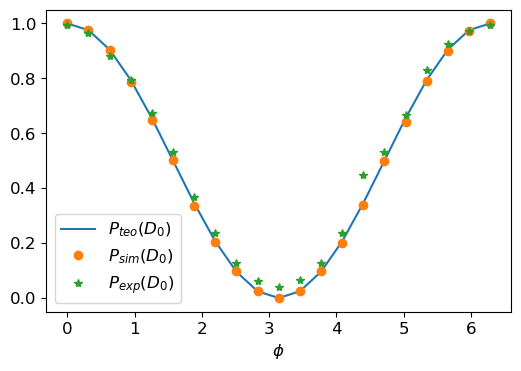

In [22]:
matplotlib.rcParams.update({'font.size':12}); plt.figure(figsize = (6,4), dpi = 100)
plt.plot(ph, PD0teo, label = r'$P_{teo}(D_{0})$')
plt.plot(ph, PD0sim, 'o', label = r'$P_{sim}(D_{0})$')
plt.plot(ph, PD0exp, '*', label = r'$P_{exp}(D_{0})$')
plt.legend(); plt.xlabel(r'$\phi$'); plt.show()

##### Exercício
Faça a simulação e experimento para o estado inicial $|1\rangle$.

### Estado puro geral
Começamos com 
$$|\psi_{0}\rangle = c_{0}|0\rangle+c_{1}|1\rangle \doteq \begin{bmatrix}c_{0}\\c_{1}\end{bmatrix}.$$
Em seguida, aplicamos o 1º divisor de feixes
\begin{align}
|\psi_{1}\rangle & = U_{df}|\psi_{0}\rangle = \frac{1}{\sqrt{2}}\begin{bmatrix}1&i \\ i&1 \end{bmatrix}\begin{bmatrix}c_{0}\\c_{1}\end{bmatrix} = \frac{1}{\sqrt{2}}\begin{bmatrix}c_{0}+ic_{1}\\ ic_{0}+c_{1}\end{bmatrix}.
\end{align}
Seguindo, aplicamos os espelhos
\begin{align}
|\psi_{2}\rangle & = U_{e}|\psi_{1}\rangle = YZ|\psi_{1}\rangle =  \begin{bmatrix}0&-i \\ i&0 \end{bmatrix}\frac{1}{\sqrt{2}}\begin{bmatrix}c_{0}+ic_{1}\\ -ic_{0}-c_{1}\end{bmatrix} \\
& = \frac{1}{\sqrt{2}}\begin{bmatrix}-i(-ic_{0}-c_{1})\\ i(c_{0}+ic_{1})\end{bmatrix} = \frac{1}{\sqrt{2}}\begin{bmatrix}-c_{0}+ic_{1} \\ ic_{0}-c_{1}\end{bmatrix}
\end{align}
e a fase
\begin{align}
|\psi_{3}\rangle & = U_{\phi}|\psi_{2}\rangle = P(\phi)|\psi_{2}\rangle = \begin{bmatrix}1&0\\0&e^{i\phi}\end{bmatrix}\frac{1}{\sqrt{2}}\begin{bmatrix}-c_{0}+ic_{1} \\ ic_{0}-c_{1}\end{bmatrix} \\
& = \frac{1}{\sqrt{2}}\begin{bmatrix}-c_{0}+ic_{1} \\ e^{i\phi}(ic_{0}-c_{1})\end{bmatrix}.
\end{align}

Finalmente, aplicamos o 2º divisor de feixes
\begin{align}
|\psi_{4}\rangle & = U_{df}|\psi_{3}\rangle = \frac{1}{\sqrt{2}}\begin{bmatrix}1&i \\ i&1 \end{bmatrix}\frac{1}{\sqrt{2}}\begin{bmatrix}-c_{0}+ic_{1} \\ e^{i\phi}(ic_{0}-c_{1})\end{bmatrix} \\
& = \frac{1}{2}\begin{bmatrix}-c_{0}+ic_{1} + ie^{i\phi}(ic_{0}-c_{1}) \\ i(-c_{0}+ic_{1})+e^{i\phi}(ic_{0}-c_{1})\end{bmatrix} = \frac{1}{2}\begin{bmatrix}-c_{0}(1+e^{i\phi}) +ic_{1}(1-e^{i\phi}) \\ -ic_{0}(1-e^{i\phi}) -c_{1}(1+e^{i\phi}) \end{bmatrix}.
\end{align}

Com isso podemos calcular as probabilidades:
\begin{align}
Pr(0) &= \frac{|-c_{0}(1+e^{i\phi}) +ic_{1}(1-e^{i\phi})|^{2}}{4} = \frac{\big(-c_{0}(1+e^{i\phi}) +ic_{1}(1-e^{i\phi})\big)\big(-c_{0}^{*}(1+e^{-i\phi}) -ic_{1}^{*}(1-e^{-i\phi})\big)}{4} \\
&= \frac{|c_{0}|^{2}(1+\cos\phi) + |c_{1}|^{2}(1-\cos\phi) + ic_{0}c_{1}^{*}i\sin\phi  + ic_{0}^{*}c_{1}i\sin\phi}{2} \\
&= \frac{|c_{0}|^{2}(1+\cos\phi) + |c_{1}|^{2}(1-\cos\phi) - 2\Re(c_{0}c_{1}^{*})\sin\phi}{2}.
\end{align}
Note que para $c_{0}=1\ \therefore\ c_{1}=0$, obteremos o mesmo resultado do caso particular considerado anteriormente.

Abaixo mostramos outro exemplo, para o estado inicial $|\psi_{0}\rangle=|+\rangle$.

In [27]:
# gráfico para estado inicial |+>
phmax = 2*math.pi; dph = phmax/20; ph = np.arange(0, phmax+dph, dph)#; ph
d = ph.shape[0]; PD0teo = np.zeros(d); PD0sim = np.zeros(d); PD0exp = np.zeros(d)
for j in range(0, d):
    c0 = 1/math.sqrt(2); c1 = c0; 
    PD0teo[j] = (abs(c0)**2*(1+math.cos(ph[j])) + abs(c1)**2*(1-math.cos(ph[j]))\
                 - 2*((c0*np.conjugate(c1)).real)*math.sin(ph[j]))/2 
    qr = QuantumRegister(1); qc = QuantumCircuit(qr)
    qc_sp = state_prep(math.pi/2, 0); qc.append(qc_sp, [qr[0]]) # state preparation (estado |+>)
    qc_mzi = qc_mzi_sim(ph[j]); qc.append(qc_mzi, [qr[0]]) # apply sim phase damping 
    qstc = state_tomography_circuits(qc, qr[0]) # circuit for state tomography
    job = qiskit.execute(qstc, Aer.get_backend('qasm_simulator'), shots=nshots)
    qstf = StateTomographyFitter(job.result(), qstc); rho = qstf.fit(method='lstsq')
    PD0sim[j] = rho[0,0].real

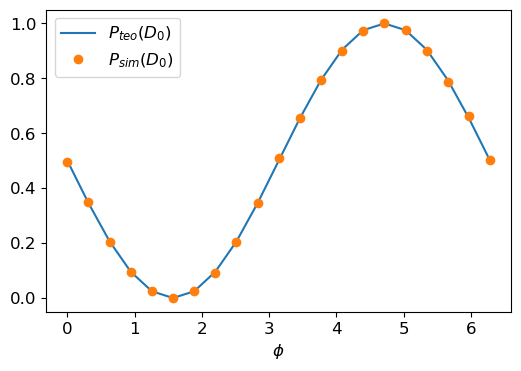

In [29]:
matplotlib.rcParams.update({'font.size':12}); plt.figure(figsize = (6,4), dpi = 100)
plt.plot(ph, PD0teo, label = r'$P_{teo}(D_{0})$')
plt.plot(ph, PD0sim, 'o', label = r'$P_{sim}(D_{0})$')
plt.legend(); plt.xlabel(r'$\phi$'); plt.show()

### Operador densidade
A partir deste resultado podemos obter também o resultado geral para o estado inicial sendo um operador densidade qualquer
$$\rho_{0} = Pr(\psi)|\psi\rangle\langle\psi| + Pr(\psi_{\perp})|\psi_{\perp}\rangle\langle\psi_{\perp}|,$$
uma vez que
\begin{align}
Pr(0|\rho_{0}) = Pr(\psi)Pr(0|\psi) + Pr(\psi_{\perp})Pr(0|\psi_{\perp})
\end{align}
e $Pr(0|\psi)$ e $Pr(0|\psi_{\perp})$ são dados como na fórmula geral para estados puros mostrada acima. 

Vale mencionar como __exemplo__ o estado misto 
$$\rho_{0} = (|0\rangle\langle0|+|1\rangle\langle1|)/2 = I/2,$$
para o qual teremos que
\begin{align}
& Pr(0) = Pr(1) = 1/2, \\
& Pr(0|0) = (1+\cos\phi)/2 \text{, } Pr(0|0) = (1-\cos\phi)/2, \\
& Pr(0|I/2) = 0.5(1+\cos\phi)/2 + 0.5(1-\cos\phi)/2 = 0.5.
\end{align}
Nesse caso a visibilidade do padrão de interferência é nula
$$V = \frac{P_{\max}-P_{\min}}{P_{\max}+P_{\min}} = \frac{0.5-0.5}{0.5+0.5} = 0.$$

Para um __exemplo__ um pouco mais geral, consideremos o estado 
$$\rho_{0} = w|0\rangle\langle 0| + (1-w)|1\rangle\langle 1|.$$
Vale notar que este estado é o operador densidade reduzido obtido da seguinte purificação
$$|\Psi_{0}\rangle = \sqrt{w}|00\rangle+\sqrt{1-w}|11\rangle.$$
Nesse caso, teremos
\begin{align}
& Pr(0)=w \text{, } Pr(1) = 1-w, \\
& Pr(0|0) = (1+\cos\phi)/2 \text{, } Pr(0|1) = (1-\cos\phi)/2, \\
& Pr(0|\rho_{0}) = w(1+\cos\phi)/2 + (1-w)(1-\cos\phi)/2 = \frac{1+(2w-1)\cos\phi}{2}.
\end{align}
Abaixo graficamos esta probabilidade para alguns valores de $w$.

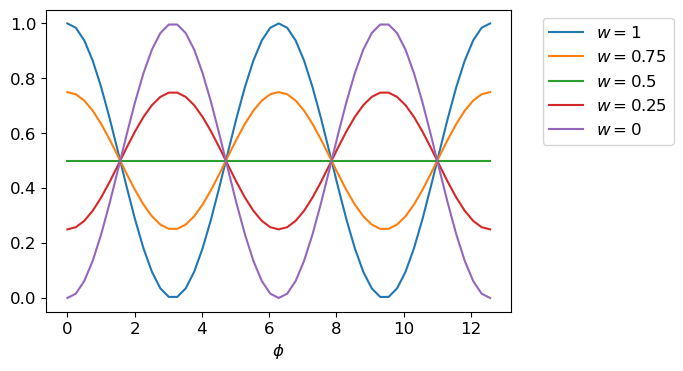

In [35]:
phmax = 4*math.pi; dph = phmax/50; ph = np.arange(0, phmax+dph, dph); d = ph.shape[0]
w = 1; pw1 = (1+(2*w-1)*np.cos(ph))/2; w = 0.25; pw025 = (1+(2*w-1)*np.cos(ph))/2
w = 0.5; pw05 = (1+(2*w-1)*np.cos(ph))/2; w = 0.75; pw075 = (1+(2*w-1)*np.cos(ph))/2
w = 0; pw0 = (1+(2*w-1)*np.cos(ph))/2
matplotlib.rcParams.update({'font.size':12}); plt.figure(figsize = (6,4), dpi = 100)
plt.plot(ph, pw1, label = r'$w=1$'); plt.plot(ph, pw075, label = r'$w=0.75$')
plt.plot(ph, pw05, label = r'$w=0.5$'); plt.plot(ph, pw025, label = r'$w=0.25$')
plt.plot(ph, pw0, label = r'$w=0$')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left'); plt.xlabel(r'$\phi$'); plt.show()

In [45]:
def shannon_num(pv):
    d = pv.shape[0]; SE = 0.0; j = -1
    while (j < d-1):
        j = j + 1
        if pv[j] > 10**-15 and pv[j] < (1.0-10**-15):
            SE -= pv[j]*math.log(pv[j], 2)
    return SE
import scipy.linalg.lapack as lapak
def von_neumann_num(rho):
    d = rho.shape[0]; b = lapak.zheevd(rho)
    return shannon_num(b[0])

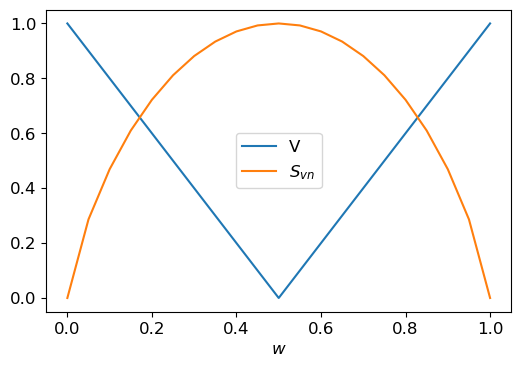

In [47]:
def V(pd):
    return (np.max(pd)-np.min(pd))/(np.max(pd)+np.min(pd))
def pd_ph(w):
    phmax = 4*math.pi; dph = phmax/100; ph = np.arange(0, phmax+dph, dph)
    return (1+(2*w-1)*np.cos(ph))/2
def rhow(w):
    return np.array([[w,0],[0,1-w]])
w = np.arange(0, 1.05, 0.05); d = w.shape[0]; Vis = np.zeros(d); Svn = np.zeros(d)
for j in range(0, d):
    pd = pd_ph(w[j]); Vis[j] = V(pd); rho = rhow(w[j]); Svn[j] = von_neumann_num(rho)
matplotlib.rcParams.update({'font.size':12}); plt.figure(figsize = (6,4), dpi = 100)
plt.plot(w, Vis, label = 'V'); plt.plot(w, Svn, label = r'$S_{vn}$') 
plt.xlabel(r'$w$'); plt.legend(); plt.show()

Vemos assim que a visibilidade do padrão de interferência é inversamente proporcional à entropia do estado de entrada do IMZ.